# Supervised learning
# Linear regression
Linear regression is a supervised learning problem that consists in finding the curve that best fits some data points.

We start considering the simple case of $m$ points in the 2D space, and we look for a linear regressor that fits the data well. That regressor has the form:
$$\hat{y} = \theta_1x + \theta_2$$
Our goal is to find $\left[\theta_1, \theta_2\right]^T$ that minimize the mean squared error:
$$\frac{1}{2m}\sum_{i=1}^{m}{(y-\hat{y})^2}$$
To minimize that quantity, we can use the gradient descent method:
$$w_i \rightarrow w_i - \alpha\frac{\partial}{\partial w_i}\text{Error}$$

At this point, it seems that we've seen two ways of doing linear regression.
- **Stochastic**: By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
- **Batch**: By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.

If our data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split the data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update the weights. This is still called mini-batch gradient descent.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

bmi_life_data = pd.read_csv("datasets/bmi_and_life_expectancy.csv")

# Setup and fit the model with data
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print('Life expectancy for a BMI of 21.07931 is equal to {}'.format(laos_life_exp[0][0]))

Life expectancy for a BMI of 21.07931 is equal to 60.315647163993056


## Higher dimensions
The prediction in a $n$ dimensional space, with variables $x_1,x_2,...,x_{n-1}$ is a $n-1$ dimensional hyperplane.

$$\hat{y}=\theta_1x_1+\theta_2x_2+\dots+\theta_{n-1}x_{n-1}+\theta_n$$

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
X = boston_data['data']
y = boston_data['target']

# Fit the model and assign it to the model variable
model = LinearRegression()
model.fit(X, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# Predict housing price for the sample_house
prediction = model.predict(sample_house)

Why don't we simply compute the derivatives of the error function and set to zero, obtaining a system of linear equations in the variables $\theta_i$? If the number of variables is $n$, we would have to solve a linear systems of $n$ equations and $n$ unknowns. That can be very expensive when $n$ is high. For this reason, gradient descent is a good alternative.

## Regularization
Consider two model, one simpler, with just two variables, and one more complex:

$$3x_1+4x_2+5=0$$

$$2x_1^3-2x_1^2x_2-4x_2^3+3x_1^3+6x_1x_2+4x_2^2+5=0$$

### L1 Regularization
L1 regularization consists in taking the absolute values of the coefficients, and adding them to the error of our model.

$$\text{Error} = |3| + |4| = 7$$

$$\text{Error} = |2| + |-2| + |-4| + |3| + |6| + |4| = 21$$

- L1 regularization is computationally inefficient unless data is sparse.
- Gives us features selection

### L2 Regularization
L2 regularization consists in taking the squared values of the coefficients, and adding them to the error of our model.

$$\text{Error} = 3^2 + 4^2 = 25$$

$$\text{Error} = 2^2 + (-2)^2 + (-4)^2 + 3^2 + 6^2 + 4^2 = 85$$

There exists applications that requires a small error in the model, so we it is ok if it is a complex model and so *punishment* on the complexity should be small. In other cases, simplicity is required, so we can accept errors in our model and so *punishment* on the complexity should be large. That *punishment* is regulated by the $\lambda$ parameter.

- L2 regularization is computationally efficient and better for unsparse data (uniformily distributed between columns).

# The perceptron algorithm
The perceptron algorithm belongs to the category of classification algorithms, and it is the basis of a neural network. The first concept of the perceptron learning rule was published by Frank Rosenblatt in 1957, and it was based on the McCullock-Pitts (MCP) neuron model: a concept of a simplified brain cell, published by Warren McCullok and Walter Pitts in 1943. Neurons are interconnected brain cells in the brain; McCullock and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, are then integrated into the cell body, and, if the accumulated signals exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

<img src="images/Perceptron/neuron.png" style="width:60%"/>

We can pose this problem as a binary classification task where we refer to the two classes as 1 (positive class) and -1 (negative class). Then there is an **activation function** $\phi(z)$ that takes a linear combination of certain input values $x$ and a corresponding weight vector $w$, where $z=w_1x_1+...+w_mx_m$ is called the net input.

In this algorithm, the activation function $\phi(z)$ is a variant of the unit step function:

$$\phi(z)=\begin{cases}1 & \text{if }z\ge \theta \\ -1 & \text{otherwise}\end{cases}$$

We can bring the threshold $\theta$ to the left side of the equation and define $w_0=-\theta$ and $x_0=1$, so that $z=w^Tx$ and we can write:

$$\phi(z)=\begin{cases}1 & \text{if }z\ge 0 \\ -1 & \text{otherwise}\end{cases}$$

The weight $w_0=-\theta$ is usually called the **bias unit**.

For instance, in $\mathbb{R}^2$ we would have:
- $w = \begin{bmatrix}w_0 & w_1 & w_2\end{bmatrix}$
- $x= \begin{bmatrix}1 & x_1 & x_2\end{bmatrix}^T$

and $w_1x_1 + w_2x_2 + w_0= 0$ is a line in $\mathbb{R}^2$.

## The algorithm
```
Initialize w_0...w_n to 0 or to small random values
for each misclassified point (x_1...x_m):
    if prediction = 0:
        for i=0...n:
            w_i = w_i + learn_rate * x_i
    if prediction = 1:
        for i=0...n:
            w_i = w_i - learn_rate * x_i
```

In a more general way, the update term is calculated by the perceptron learning rule:

$$\Delta w_j = \eta \left(y^{(i)}-\hat{y}^{(i)}\right)x_j^{(i)}$$

where:
- $\eta \in (0,1)$ is the learning rate
- $y^{(i)}$ is the true class label of the i-th training sample
- $\hat{y}^{(i)}$ is the predicted class label

Note that all the weights are updated simultaneously, meaning that the predicted label $\hat{y}^{(i)}$ is not recomputed before all of the weights are updated.

## Perceptrons as Logical Operators
In the following code snippet, we'll implement a logical AND port using a perceptron.

In [3]:
import pandas as pd

# Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -2.0

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -2.0                    0          Yes
       0          1                  -1.0                    0          Yes
       1          0                  -1.0                    0          Yes
       1          1                   0.0                    1          Yes


## The algorithm
Consider the following example in the $\mathbb{R}^2$ space. The main idea behind this algorithm is to start from an initial line, let's say $3x_1+4x_2-10=0$ and to have a misclassified point $(4,5)$. What we do is to add a bias term to the point that will become $(4,5,1)$, then we multiply its components for a learning rate $\alpha$, let's say $\alpha=0.1$, and we subtract it to the equation of the line, obtaining $(3-0.4)x_1+(4-0.5)x_2+(-10-0.1)=0$ that is $2.6x_1+3.5x_2-10.1=0$ which is **a line that is closer to the original point**.

Note that the convergence of the algorithm is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small, otherwise we can set a maximum number of **epochs** (passes on the training set).

In [4]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def net_input(X, W):
    return np.dot(X, W[1:]) + W[0]

def prediction(X, W):
    return np.where(net_input(X, W) >= 0.0, 1, -1)

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, learn_rate = 0.01):
    error = 0
    for xi, target in zip(X, y):
        update = learn_rate * (target - prediction(xi, W))
        W[1:] += update * xi
        W[0] += update
        error += int(update != 0.0)
    return W, error
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, error = perceptronStep(X, y, W, learn_rate)
        boundary_lines.append(W)
        errors.append(error)
    return boundary_lines, errors

### Visualize the training set

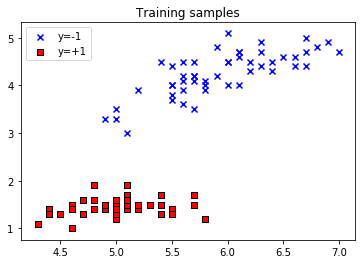

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Iris dataset (linearly separable data)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
header=None)
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Not linearly separable data
#data = pd.read_csv("datasets/perceptron_data.csv", header=None)
#X = data.iloc[:,[0,1]].to_numpy()
#y = data.iloc[:,2].to_numpy()
#y = np.where(y == 0, -1, 1)

# Plot the data
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='x', label='y=-1')
plt.scatter(X[y==-1,0], X[y==-1,1], color='red', marker='s', label='y=+1', edgecolor='black')
plt.legend(loc='upper left')
plt.title('Training samples')
plt.show()

### Train the perceptron algorithm and visualize the result

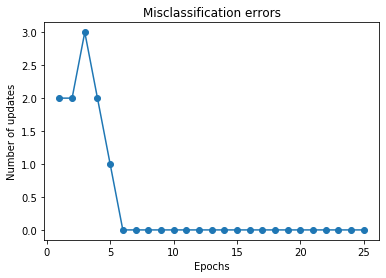

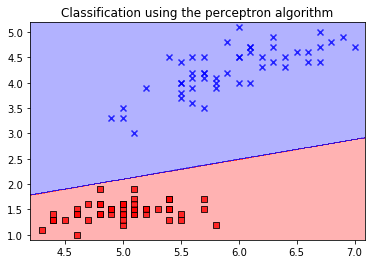

In [9]:
# Utility function to plot the decision regions
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, W, resolution=0.01):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = prediction(np.array([xx1.ravel(), xx2.ravel()]).T, W)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title('Classification using the perceptron algorithm')
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')
        
# train the data
lines, errors = trainPerceptronAlgorithm(X, y)

# plot the misclassification error for each epoch
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Misclassification errors')
plt.show()

# plot decision regions
plot_decision_regions(X, y, lines[-1])

# Adaptive linear neurons
Another type of single-layer neural network is the Adaptive Linear Neuron (**Adaline**), published by Bernard Widrow in 1960. The main difference with the Perceptron is that the weights are updated based on a *linear activation function* rather than a unit step function (which is still used as a thershold function to make the final prediction). This linear activation function is the identity function of the net input, so that:

$$\phi\left(w^Tx\right)=w^Tx$$

- **Adaline**: compares the true class labels with the linear activation function's continuous valued ouput to compute the errors.
- **Perceptron**: compares the true class labels to the predicted ones to compute the errors.

The key factor is an **objective function** that is to be optimized. In this case, the objective function is a cost function, defined as the **sum of squared errors (SSE)** between the predicted output and the true label:

$$J(w)=\frac{1}{2}\sum_{i}{\left(y^{(i)}-\phi\left(z^{(i)}\right)\right)^2}$$

The main advantage of using a continous linear activation function, in contrast to the unit step function, is that the cost function becomes differentiable and convex. We can minimize that cost function using **gradient descent**, updating, at each step, the weights by taking a step in the opposite direction of the gradient $\nabla J(w)$ of the cost function $J(w)$:
$$w:= w+\Delta w$$

where $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\eta$:

$$\Delta w=-\eta\nabla J(w)$$

that is:

$$\Delta w_j=-\eta \frac{\partial J}{\partial w_j}=\eta \sum_{i} \left(y^{(i)}-\phi \left(z^{(i)}\right)\right)x_j^{(i)}$$

**Observation:** The weight update is calculated based on all examples in the training dataset (instead of updating the weights incrementally after each training example), which is why this approach is also referred to as batch
gradient descent.

**Observation:** There exists many variants of the standard gradiend descent method, for example the [conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method).

In [10]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def net_input(X, W):
    return np.dot(X, W[1:]) + W[0]

# This useless function is here to explicit the activation function 
def activation(X):
    return X

def prediction(X, W):
    return np.where(activation(net_input(X, W)) >= 0.0, 1, -1)

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array that includes also the bias term w_0)
# update the weights W, according to the adaline algorithm,
# and return W.
def adalineStep(X, y, W, learn_rate = 0.01):
    net_input_ = net_input(X, W)
    output = activation(net_input_)
    errors = (y - output)
    W[1:] += learn_rate * X.T.dot(errors)
    W[0] += learn_rate * errors.sum()
    cost = (errors**2).sum() / 2.0
    return W, cost

# This function runs the adaline algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
def trainAdalineAlgorithm(X, y, learn_rate = 0.0005, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    # These are the solution lines that get plotted below.
    boundary_lines = []
    costs = []
    for i in range(num_epochs):
        # In each epoch, we apply the adaline step.
        W, cost = adalineStep(X, y, W, learn_rate)
        boundary_lines.append(W)
        costs.append(cost)
    return boundary_lines, costs

### Train Adaline and visualize the result

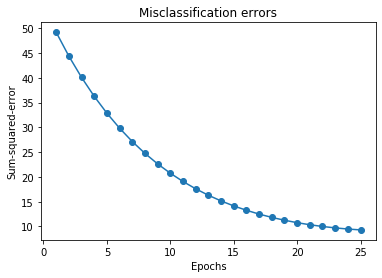

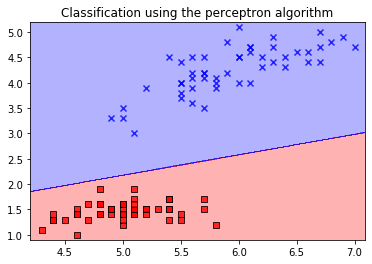

In [11]:
def plot_decision_regions(X, y, W, resolution=0.01):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = prediction(np.array([xx1.ravel(), xx2.ravel()]).T, W)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title('Classification using the perceptron algorithm')
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')
        
# train the data
lines, costs = trainAdalineAlgorithm(X, y)

# plot the misclassification error for each epoch
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Misclassification errors')
plt.show()
# plot decision regions
plot_decision_regions(X, y, lines[-1])

**Observation:** choosing a learning rate that is too big (e.g. 0.01), may lead to a continuously increasing error. We can easily visualize it by choosing `learn_rate = 0.01` and plotting the `costs` vector on a semilog plot.

# Feature scaling
Many optimization algorithms benefit from feature scaling methods. Gradient descent is one of them, and we can improve its performance by using ***standardization***, giving our data the properties of a standard normal distribution: *zero-mean* and *unit variance*. Doing that will allow the optimizer to go through fewer steps to find a good solution.

To **standardize the *j*th feature**, we can subract the sample mean $\mu_j$ from every training example and divide it by its standard deviation $\sigma_j$:

$$x_j' = \frac{x_j-\mu_j}{\sigma_j}$$

where $x_j$ is a vector containing the values of the *j*th feature for all the $n$ traning examples

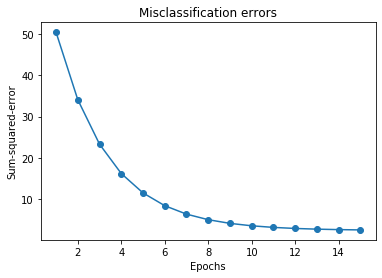

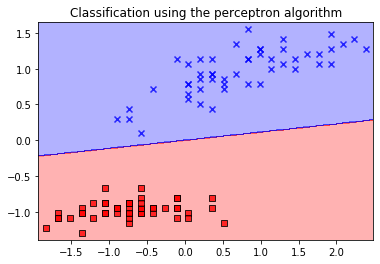

In [12]:
# standardize the data
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# train the data
lines, costs = trainAdalineAlgorithm(X_std, y, learn_rate=0.01, num_epochs=15)

# plot the misclassification error for each epoch
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Misclassification errors')
plt.show()
# plot decision regions
plot_decision_regions(X_std, y, lines[-1])

# Large-scale ML and stochastic gradient descent
Suppose that we have a very large dataset, containing millions of entries. Batch gradient descent can be computationally high costly since we need to reevaluate the whole training set each time we take a step through the global minimum.
At this point, an alternative to the batch gradiend descent comes in our help: the **stochastic gradiend descent (SGD)**.

Instead of updating the weights based on the sum of the accumulated errors over all training examples, weights are incrementally updated for each training example:

$$\eta\left(y^{(i)}-\phi(z^{(i)})\right)x^{(i)}$$

Note that SGD doesn't reach the global minimum but an area very close to it. One advantage of SGD is that it can be used for **online learning**, where the model is trained and updated as new training data comes.

**Observation:** More satisfying results can be obtained via SGD by presenting training data in random order; also, we want to shuffle the training set for every epoch to prevent cycles.

### Dynamic learning rate
Instead of using a fixed, chosen a priori, learning rate, $\eta$ is often replaced by a learning rate that decreases over time, for example:

$$\eta = \frac{c_1}{[\text{number of iterations}] + c_2}$$

where $c_1$ and $c_2$ are constants.

### Mini-batch gradient descent
Mini-batch learning can be thought as applying batch gradient descent to smaller subsets of the training data. The convergence is reached faster than with the batch gradient descent because of the frequent weight updates. Furthermore, mini-batch learning allows us to replace the `for` loop over the training examples in SGD with vectorized operations (for example, implementing a weighted sum via a dot product), which can improve the computational efficiency.


In [13]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1: # if it is a batch
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

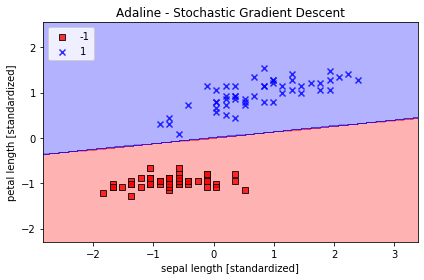

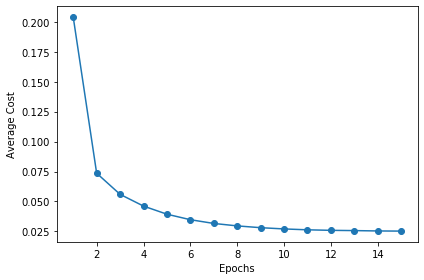

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # classify each point of the meshgrid
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Train Adaline with stochastic gradient descent
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

In an online learning scenario, we could call the `partial_fit` method on individual training examples, for instance `ada_sgd.partial_fit(X_std[0, :], y[0])`